# Using Kaggle On Colab

## 1.1 Upload Kaggle.json to connect Colab to kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Import Libraries

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os 
np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set_style('darkgrid')

# Load Dataset

## 2.1 Open Folders

In [ ]:
## For Colab 

Normal = '/content/drive/MyDrive/Eye disease/normal'
Abnormal = '/content/drive/MyDrive/Eye disease/mpc'


print(f'In Noramal Folder, We Found {len(os.listdir(Normal))} Image')
print(f'In Abnormal Folder, We Found {len(os.listdir(Abnormal))} Image')

In Noramal Folder, We Found 104 Image
In Abnormal Folder, We Found 104 Image


## 2.2 Label each Class

In [ ]:
SIZE = 128

folders = {
    # 'key', 'value'
    Normal: 0,
    Abnormal : 1,
    
}

for i in folders:
    print(f'The label of folder {i} is: {folders[i]}')


The label of folder /content/drive/MyDrive/Eye disease/normal is: 0
The label of folder /content/drive/MyDrive/Eye disease/mpc is: 1


## 2.3 Reading Images

In [ ]:
import cv2

folders_paths = [Normal, Abnormal]

Data = []
Label = []

for folder in folders_paths:
    # x = 0
    for image in os.listdir(folder):
        # x +=1
        image = cv2.imread(os.path.join(folder, image))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_array = cv2.resize(image, (SIZE, SIZE))
        Data.append(image_array)
        Label.append(folders[folder])
 

# Eye Detection

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [ ]:
faces_detected = face_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5)

In [ ]:
(x, y, w, h) = faces_detected[0]
cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 1);

In [ ]:
eyes = eyes_cascade.detectMultiScale(image[y:y+h, x:x+w])
for (ex, ey, ew, eh) in eyes:
    cv2.rectangle(image, (x+ex, y+ey), (x+ex+ew, y+ey+eh), 
                  (255, 255, 255), 1)

## 2.4 Check Number of images

In [ ]:
print(f'The total Number of images is: {len(Data)} image')
print(f'The total Number of labels is: {len(Label)} image')


The total Number of images is: 208 image
The total Number of labels is: 208 image


## 2.5 Sample of Data

In [ ]:
print(Data[0])  
print(Label[0])
print(f'Type of Reading Images is {type(Data)}')

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
0
Type of Reading Images is <class 'list'>


## 2.6 Visualize some images

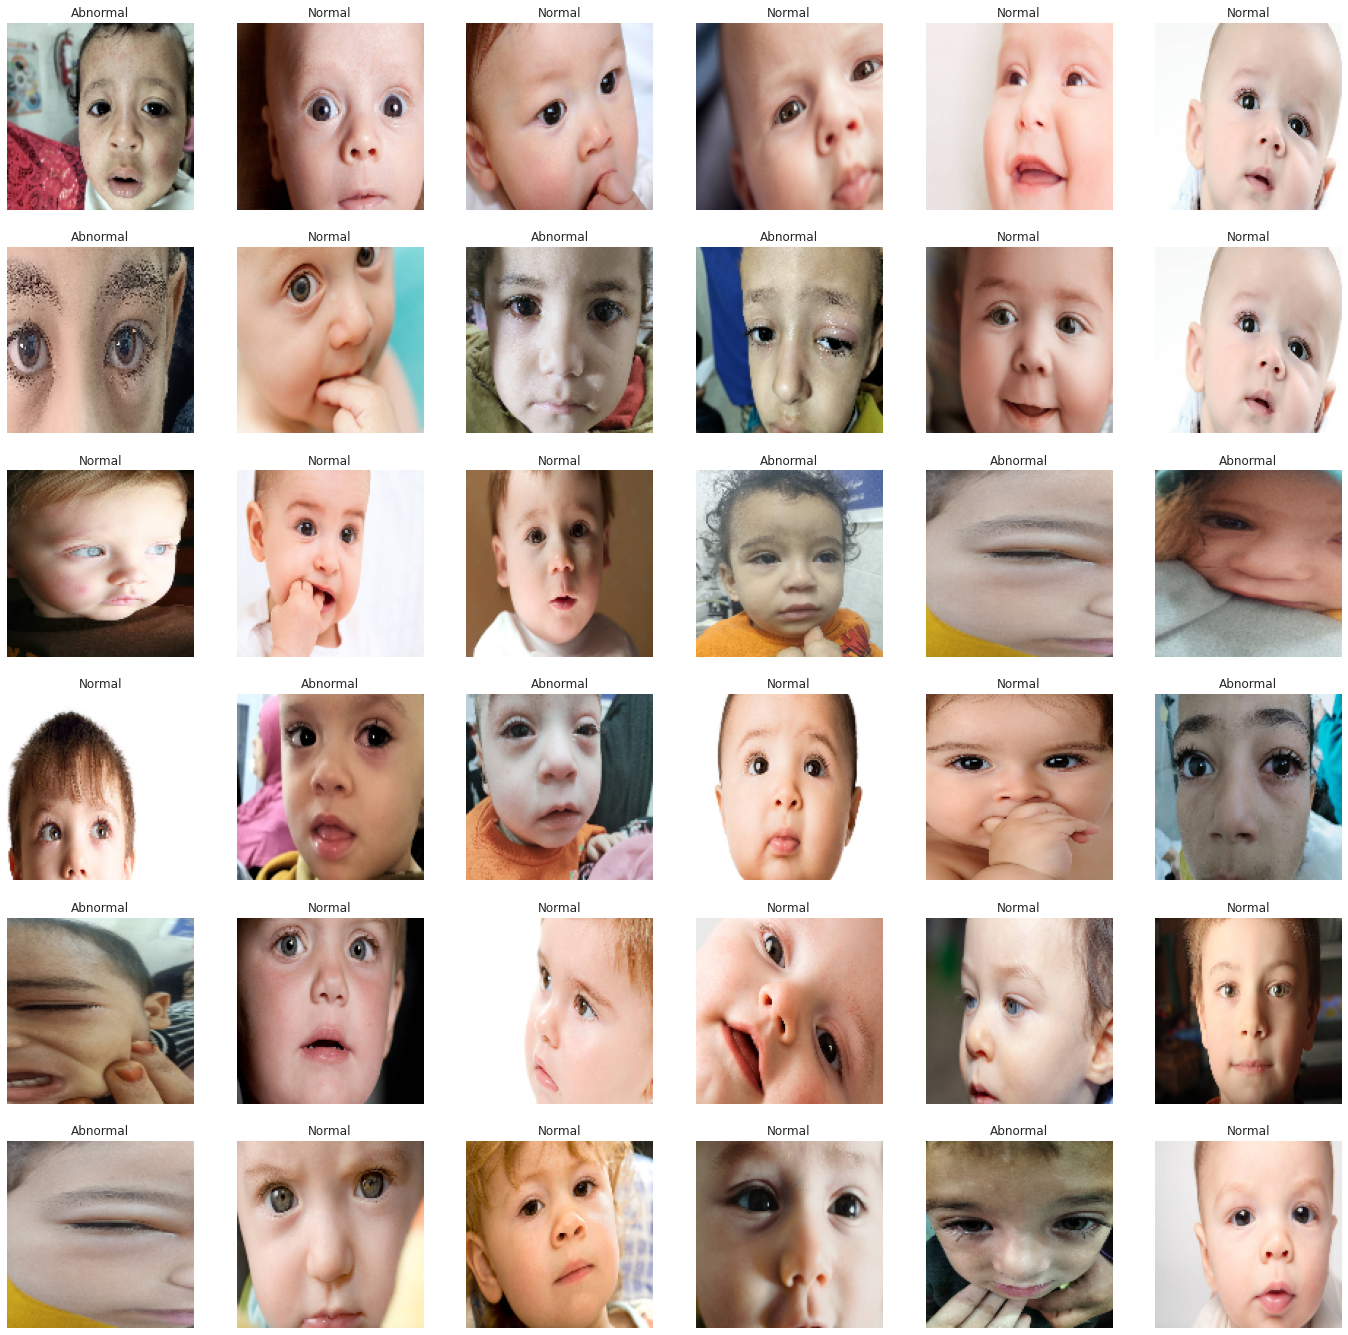

In [ ]:
folders_name = {
        # 'Key' : value 
        'Normal':0 ,
        'Abnormal':1,
        
    }

def get_folder_name(x):
    # function to return class name
    for key, value in folders_name.items():
        if x == value:
            return key


plt.figure(figsize=(24,24))
for n , i in enumerate(list(np.random.randint(0,len(Data),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(Data[i])   
    plt.axis('off')
    plt.title(get_folder_name(Label[i]))


## 2.7 Convert Data to Array

In [ ]:
Data = np.array(Data)
Label = np.array(Label)

print(f'Data shape is {Data.shape}')
print(f'Label shape  is {Label.shape}')

Data shape is (208, 128, 128, 3)
Label shape  is (208,)


## 2.8 Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data, Label, test_size=0.2, random_state=1)

In [ ]:
print(f'X_train shape is {X_train.shape}')
print(f'X_test shape is {X_test.shape}')
print(f'y_train shape is {y_train.shape}')
print(f'y_test shape is {y_test.shape}')

X_train shape is (166, 128, 128, 3)
X_test shape is (42, 128, 128, 3)
y_train shape is (166,)
y_test shape is (42,)


# Building CNN Model

## 3.1 Intialize the CNN Network

In [ ]:
#First Architecture

# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(SIZE,SIZE,3), padding='same'))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

          
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
          
model.add(Flatten())
model.add(Dense(265, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax')) 

In [ ]:
# # Second Architecture
# import keras
# model = keras.models.Sequential([
#         keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(SIZE,SIZE,3)),
#         keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
#         keras.layers.MaxPool2D(4,4),
#         keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
#         keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
#         keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
#         keras.layers.MaxPool2D(4,4),
#         keras.layers.Flatten() ,    
#         keras.layers.Dense(120,activation='relu') ,    
#         keras.layers.Dense(100,activation='relu') ,    
#         keras.layers.Dense(50,activation='relu') ,        
#         keras.layers.Dropout(rate=0.5) ,            
#         keras.layers.Dense(4,activation='softmax') ,    
#         ])

## 3.2 Compile Neural Network

In [ ]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                        

## 3.3 Training the Model 

In [ ]:
epochs = 20
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs,batch_size=64,verbose=1)

Epoch 1/20
3/3 [==============================] - 15s 943ms/step - loss: 911.4861 - accuracy: 0.5181 - val_loss: 53.7248 - val_accuracy: 0.5238
Epoch 2/20
3/3 [==============================] - 0s 97ms/step - loss: 55.1958 - accuracy: 0.5422 - val_loss: 19.0676 - val_accuracy: 0.4762
Epoch 3/20
3/3 [==============================] - 0s 95ms/step - loss: 15.5297 - accuracy: 0.4578 - val_loss: 1.4631 - val_accuracy: 0.5238
Epoch 4/20
3/3 [==============================] - 0s 97ms/step - loss: 2.2162 - accuracy: 0.5482 - val_loss: 0.6976 - val_accuracy: 0.4762
Epoch 5/20
3/3 [==============================] - 0s 100ms/step - loss: 0.8679 - accuracy: 0.5783 - val_loss: 0.7595 - val_accuracy: 0.4762
Epoch 6/20
3/3 [==============================] - 0s 97ms/step - loss: 0.7642 - accuracy: 0.5542 - val_loss: 0.8883 - val_accuracy: 0.5952
Epoch 7/20
3/3 [==============================] - 0s 95ms/step - loss: 0.8263 - accuracy: 0.5964 - val_loss: 0.8857 - val_accuracy: 0.5952
Epoch 8/20
3/3 [==

## 3.4 Model Evaluation

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print('Test Loss is {}'.format(loss))
print('Test Accuracy is {}'.format(acc))

2/2 [==============================] - 1s 189ms/step - loss: 0.4696 - accuracy: 0.8571
Test Loss is 0.4695635437965393
Test Accuracy is 0.8571428656578064


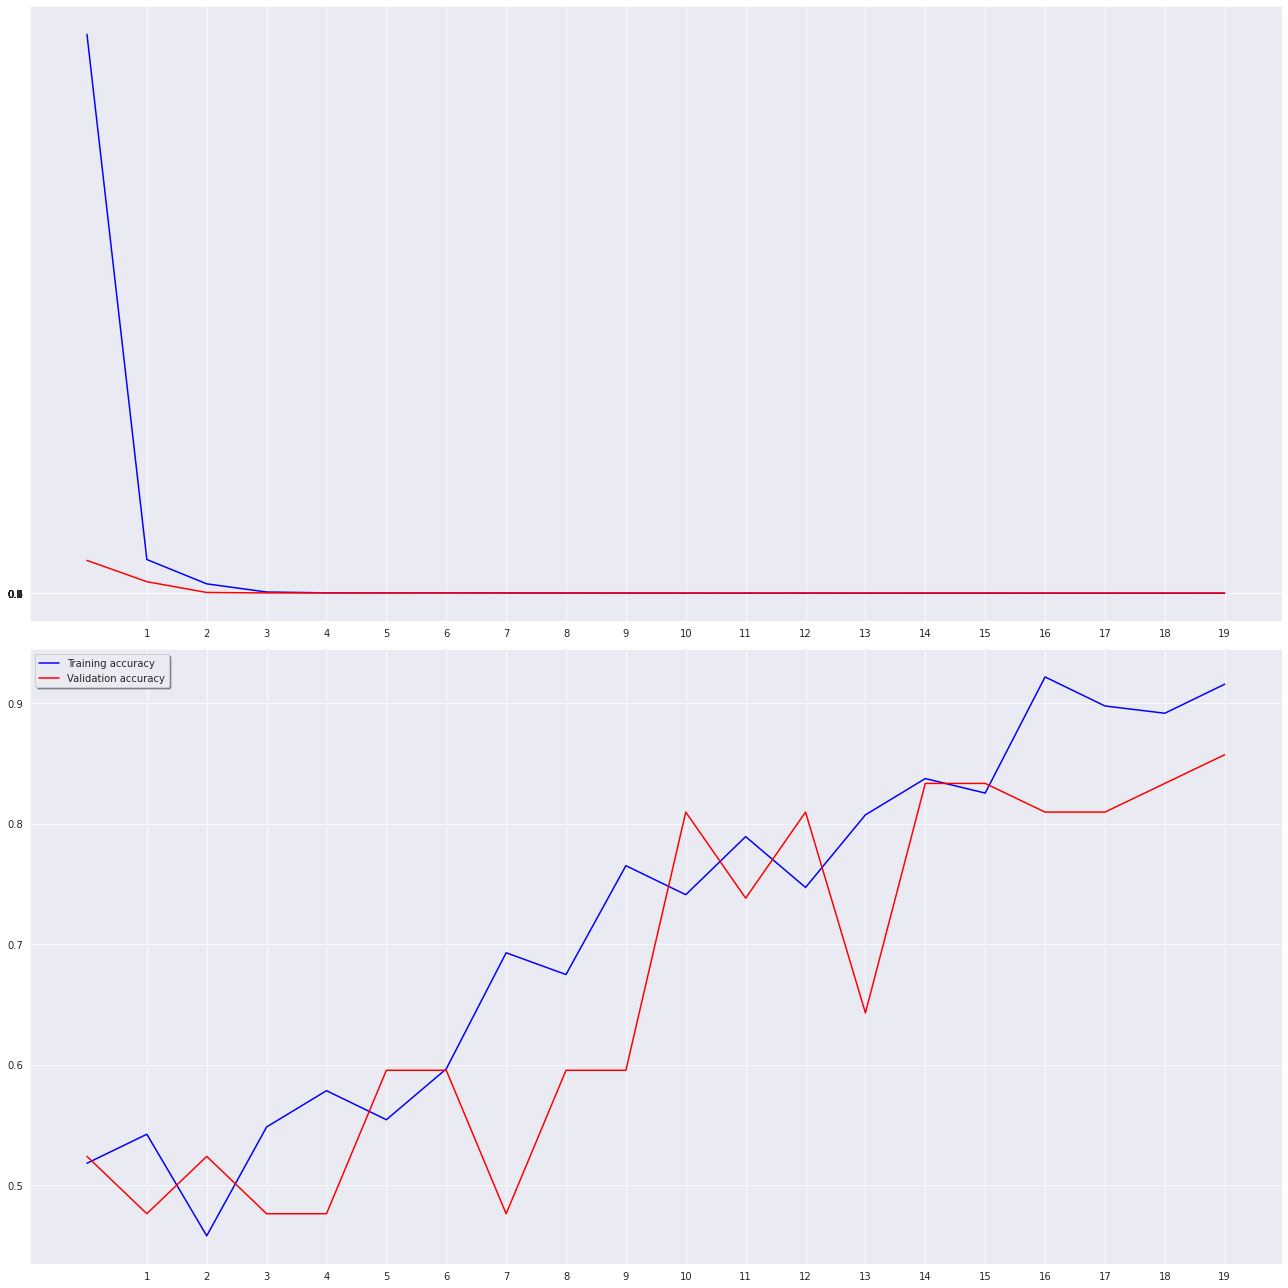

In [ ]:
# Plot the loss and accuracy curves for training and validation

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 18))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

## 3.4.2 Confusion Matrix

2/2 [==============================] - 0s 13ms/step


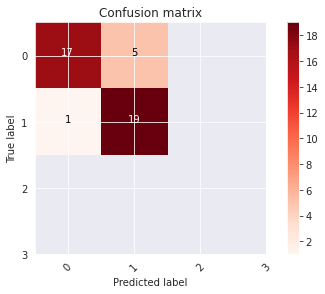

In [ ]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = y_test
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(4)) 

## 3.5 Prediction

In [ ]:
# predict results
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 13ms/step


In [ ]:
# Some checks 
y_predict = []
for i in range(10):
    y_predict.append(np.argmax(y_pred[i]))
    
y_predict = np.array(y_predict)
print(y_predict)
print(y_test[0:10])

[1 1 1 1 1 0 1 0 1 1]
[1 1 1 1 0 0 1 0 1 0]


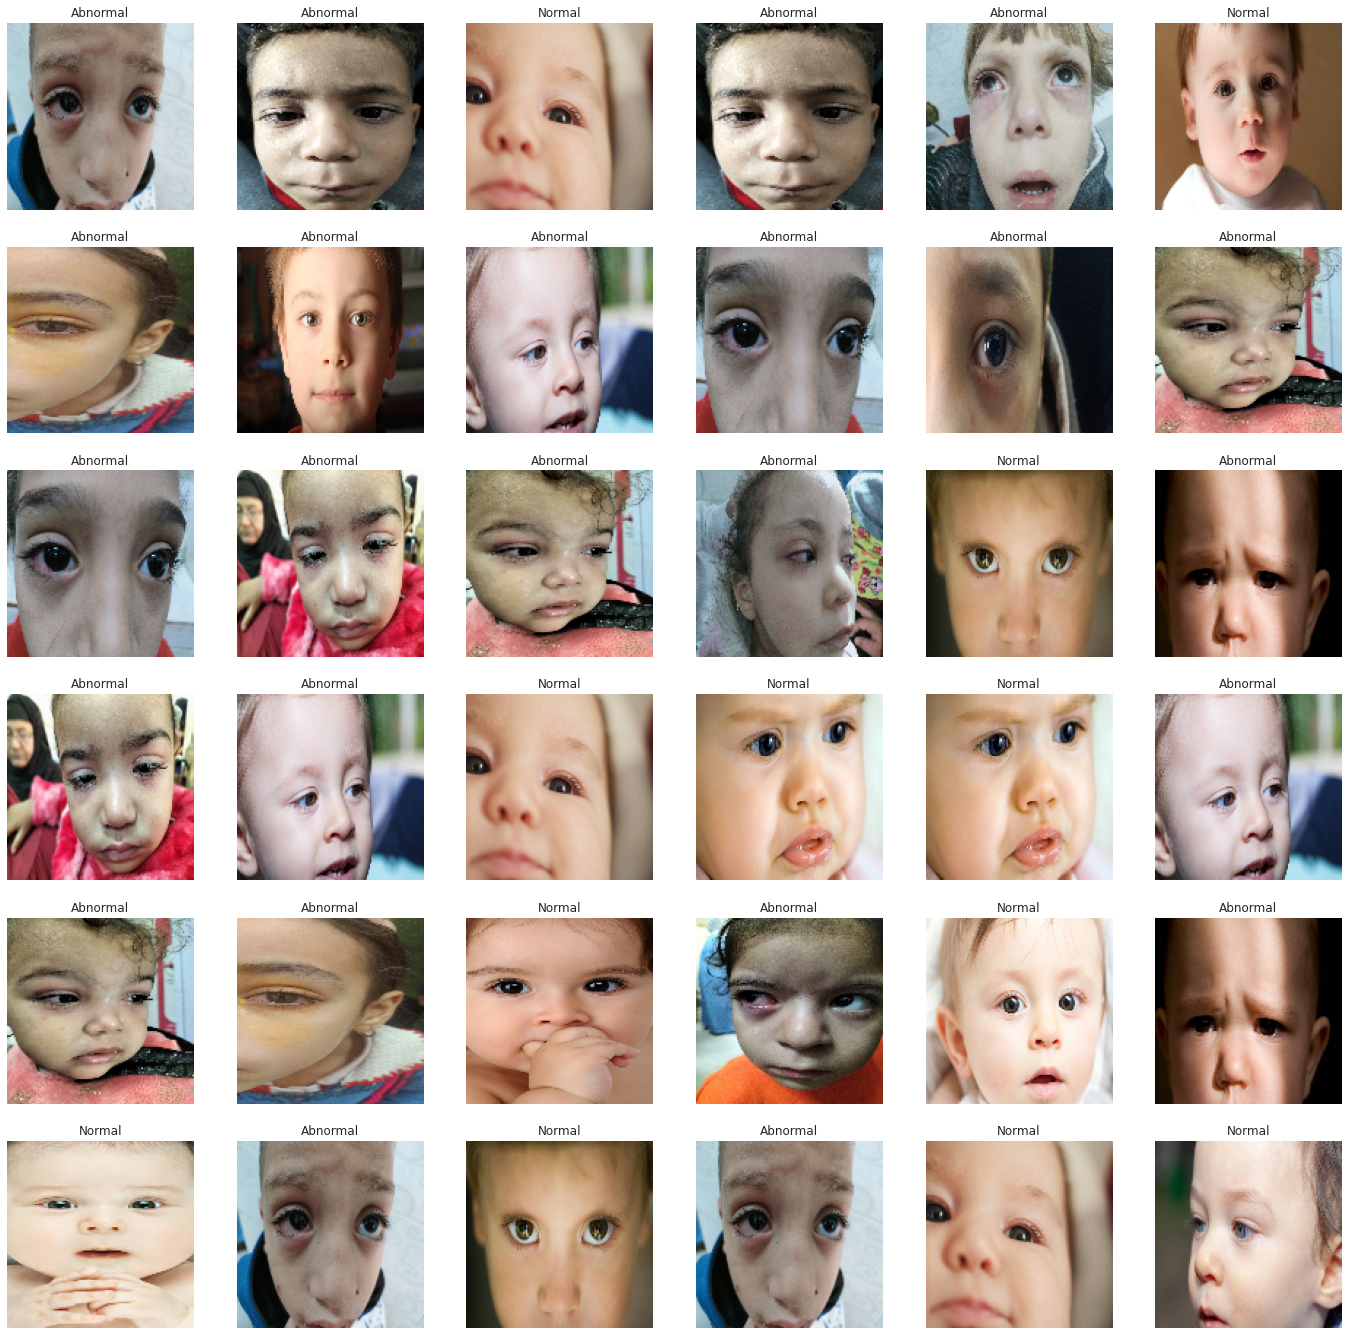

In [ ]:
plt.figure(figsize=(24,24))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])   
    plt.axis('off')
    plt.title(get_folder_name(np.argmax(y_pred[i])))

## 3.6 Saving Model

In [ ]:
model.save('/content/Basic_CNN.h5')